#Collection of prompt

**Business problem 1**: Counting the number of beer drinkers <Br>
We want to know how many people drink Heineken Vietnam beer at the restaurant. Can you identify the number of people drinking Heineken beer from the pictures?
- Count the number of people in the photos.
- Determine the number of people drinking Heineken beer.

**Business problem 2**: Detecting advertising publications <Br>
We use advertising publications such as ice boxes, standees, umbrellas, and shelves at events and display points. Can you spot materials with the brand's logo to confirm their presence in the restaurant?
- Find and list materials with the Heineken logo.
- Accurately identify each type of material (for example ice buckets, bottles, cans, refrigerators, signs, posters, display counters, display tables, umbrellas).

**Business issue 3**: Evaluating the success of the event<Br>
We want to measure the success of restaurant events. Can you help detect the number of customers participating and their mood when drinking beer?
- Count the number of people in the photos.
- Analyze the mood and atmosphere of images (emotion detection).

**Business problem 4**: Track marketing staff<Br>
We need to ensure that at least 2 people are marketing our products deployed at each location. Can you help confirm their presence?
- Identify advertising staff in images.
- Confirm whether there are at least 2 promotional staff at each restaurant location.

**Business problem 5**: Evaluate the level of presence in the store<Br>
Can you rate the quality of Heineken's presence in grocery/specialty stores? The store needs at least 1 billboard with our logo, a refrigerator with our logo, and at least 10 cases of Heineken beer.
Ensure Heineken display ideas are correctly implemented in grocery/stores.
- 1 advertising board
- 1 standee
- 10 boxes of beer

**Additional tasks**:
- Determine the context: <Br>Determine the context of the image: whether the restaurant serves or not, supermarket or convenience store.
- Identify competitor logos: <Br>Find and identify competitor logos or other brands in images.

#Fully description for an image (demo)

In [ ]:
! pip install -q --upgrade google-generativeai langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 14.1 MB/s eta 0:00:00


In [ ]:
#Model calling (2 version (pro and pro-vision) from Gemini)
from google.colab import userdata
import google.generativeai as genai
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

#Load gemini-pro-vision
gemini_pro_vision_llm = ChatGoogleGenerativeAI(model="gemini-pro-vision",
                                               google_api_key=GOOGLE_API_KEY,
                                               temperature=0.1)
#Load gemini-pro
gemini_pro_llm = ChatGoogleGenerativeAI(model="gemini-pro",
                                        google_api_key=GOOGLE_API_KEY,
                                        temperature=0.2)

In [ ]:
#Helper function
import pandas as pd
from IPython.display import display
from IPython.display import Markdown
import textwrap
import PIL

#display text (markdown)
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#display image
def display_image(img_path, scale_down = 2):
  img = PIL.Image.open(img_path).convert(mode="RGB")
  w, h = img.size
  display(img.resize((w//scale_down, h//scale_down)))

#convert dataframe to string
def convert_df2str(df):
  if isinstance(df, pd.DataFrame):
    print("This is a DataFrame")
    string = "\n".join([f'{index}: {[{col: row[col]} for col in df.columns]}' for index, row in df.iterrows()])
    return string
  else:
    print("This is not a DataFrame")
    return 'None'

In [ ]:
#Main function

#-----***-----
#Prompt list for 5 business problems
#Business problem 1: Count the number of people using beer products
problem_1 = """
Analyze the given image and provide a detailed analysis that includes:
1. Identification of people:
- Identify and describe all individuals in the image.
- Clearly state the number of individuals identified and their specific activities and emotions.
2. Confirmation of the customers use beer products:
- Identify and describe all individuals holding or near a beer bottle, can, or glass in the image.
- Clearly state the number of individuals identified and their specific activities and emotions.
- Identify and describe all individuals holding or near a beer bottle, can, or glass in the image.
"""

#Business problem 2: Detect advertising or promotional items from beer brands
problem_2 = """
Analyze the given image to perform the following tasks:
1. Identify any logos present in the image:
- These logos may include text (with various typefaces/fonts), symbols, or a combination.
- Describe all items with the identified logo, providing details about the item's type, size, color, and appearance.
2. Identify advertisement or promotional items with identified logos in the image:
- Describe all advertisement or promotional items with the identified logo, such as refrigerators (or beverage coolers), advertising signs, posters, table standees, displays, standees, ice buckets, and parasols (if present).
Merge the same information and ignore duplicate information.
Comment on the overall presentation and organization of identified items.
"""

#Business problem 3: Evaluating the success of the event
problem_3 = """
Analyze the given image and provide a detailed analysis that includes:
1. Identification of people:
- Identify and describe all individuals in the image.
- Clearly state the number of individuals identified and their specific activities and emotions.
2. Confirmation of the customers use beer products:
- Clearly state the number of individuals individuals identified and their specific activities and emotions.
- Identify and describe all individuals holding or near a beer bottle, can, or glass in the image.
- Provide details about the beer product or nearby advertisement/marketing items including its appearance or brand logos (if present).
3. Crowd's emotion and activities recognition:
- Describe the overall activities and atmosphere of the crowd. Is it happy, angry, enjoyable, relaxed, neutral or something else?
"""

#Business problem 4: Track marketing staff
problem_4 = """
Analyze the given image to confirm the presence of marketing staff at the location. Provide a detailed analysis that includes:
1. Identification of Marketing Staff:
- Identify and describe all individuals wearing branding uniforms present in the image who are involved in marketing activities.
- Provide details on their appearance, clothing, logo (if present), and any visible branding or promotional materials they are handling.
2. Confirmation of Staff Presence:
- Clearly state the number of marketing staff members identified in the image and their specific activities related to product promotion.
- Verify whether there are at least 2 marketing staff members present at the location.
Ensure that the analysis is thorough and accurate, focusing on confirming the presence and activities of the marketing staff.
"""

#Business issue 5: Assess the level of presence of beer brands in convenience stores/supermarkets
problem_5 = """
Analyze the given image to perform the following tasks:
1. Identify any logos present in the image:
- The logos may include text (with various typefaces/fonts), symbols, or a combination.
- Describe all items with the identified logo, providing details about the item's type, size, color, and appearance.
2. Identify brand items and advertisement items with identified logos:
- Describe all packaging of brands, that have the identified logo.
- Describe all advertisement items with the identified logo, such as refrigerators (or beverage coolers), advertising signs, posters, table standees, standees, display stands, and parasols (if present).
Merge the same information and ignore duplicate information.
Comment on the overall presentation and organization of identified items in the store.
"""

#-----***-----
#Define the default user choice options (if no user-selected choice)
default_opts = {"a photo at the convenience store": ["problem2", "problem4", "problem5"],
                "a photo at the supermarket": ["problem2", "problem4", "problem5"],
                "a photo at the bar or karaoke": ["problem2", "problem4"],
                "a photo at the event": ["problem2", "problem3", "problem4"],
                "a photo at the restaurant": ["problem1", "problem2", "problem3", "problem4"],}
#Define the business problem prompts
problem_prompts = {"problem1": problem_1,
                   "problem2": problem_2,
                   "problem3": problem_3,
                   "problem4": problem_4,
                   "problem5": problem_5}

#-----***-----
#image description using only image
def create_description(prompt_text, image_url, llm):
  message_content = [
      {"type": "text", "text": f"{prompt_text}",},
      {"type": "image_url", "image_url": f'{image_url}'},
  ]
  message = HumanMessage(content=message_content)
  content = llm.invoke([message]).content
  return content

#-----***-----
#Image summarization
def image_summarizing(image_url, options, CLIP_class, OCR_df, YOLOw_df, llm):
  results = {}
  if len(options) == 0:
      choices = default_opts[CLIP_class]
  else:
    choices = options
  # Iterate over each choice in the list
  for choice in choices:
    prompt_text = problem_prompts.get(choice, "")
    #image description using only image
    description = create_description(prompt_text, image_url, gemini_pro_vision_llm)
    #image enhanced description using CLIP, PadleOCR, Owlv2, YOLOv10 combine with image description using only image
    message = HumanMessage(
        content=[
            {
                "type": "text",
                "text": f"Given the initial description: '{description}' and detailed information as follows: \
                \nThis is '{CLIP_class}'. \
                \nText and their coordinates in the image: \n{convert_df2str(OCR_df)}. \
                \nObjects and their coordinates in the image: \n{convert_df2str(YOLOw_df)}. \
                \nGenerate an enhanced description of the image that incorporates these details. \
                \nNote that there may be duplicate information, remove it and only use available information."
            },
        ]
    )
    content = llm.invoke([message]).content
    results[f'{choice}'] = content
  return results

#-----***-----
#Image hashtags extracting
def extract_hashtag(llm, description):
  message = HumanMessage(
      content=[
          {
            "type": "text",
            "text": f"Create a list of the top ten best-suited hashtags for the scene from the following image description: {description}. \
            Consider relevant themes, locations, and activities in the scene. \
            For example: Hashtags: [#bar, #pub, #restaurant, #conveniencestore, #supermarket, \
            #event, #party, #celebration, #gathering, #happyhour, #funtime.]"
          },
      ]
  )
  content = llm.invoke([message]).content
  if len(content.split('\n')) > 1:
    hashtags_list = [line.split('. ')[1].strip() for line in content.split('\n')]
  else:
    hashtags_list = content.split('\n')
  return hashtags_list

In [ ]:
#Main funtion

#-----***-----
#image enhanced description using CLIP, PadleOCR, Owlv2, YOLOv10 combine with image description using only image
def create_enhanced_description(options, image_url):
  CLIP_class, environment = classify_image_clip(image_url) #please update function, datatype: string
  OCR_df = 'None' #please update function, datatype: data frame
  YOLOw_df = 'None' #please update function, datatype: data frame
  enhanced_description = image_summarizing(image_url, options, CLIP_class, OCR_df, YOLOw_df, gemini_pro_llm) #datatype: dictionary
  scene_hashtags = extract_hashtag(gemini_pro_llm, enhanced_description) #datatype: list
  print('---enhanced_description---Done---')
  return scene_hashtags, enhanced_description, environment

Demo

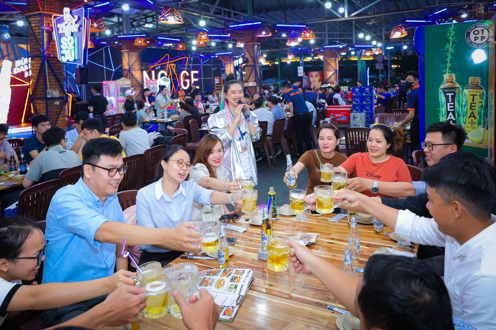

This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
Hashtags: ['#TigerBeer', '#CocaCola', '#Pepsi', '#7Eleven', '#Friends', '#GoodTimes', '#Cheers', '#PartyTime', '#Celebration', '#HappyHour']
Image description as follows: 
problem1: 
1. Identification of people:
- There are 11 individuals in the image. 
- They are all sitting around a table, and they are all holding beer glasses. 
- They are all smiling and laughing, and they appear to be enjoying themselves.


2. Confirmation of the customers use beer products:
- There are 11 individuals in the image who are holding beer glasses. 
- They are all drinking beer, and they appear to be enjoying themselves.


3. Event details:
- The image was taken at an event. 

problem2: 
There are several logos present in the image:

1. Tiger Beer: The logo is a red circle with a yellow tiger head and the text "Tiger" in white. It is present on the beer bottles and glasses on the tables.
2. Coca-Cola: The log

In [ ]:
# Example user choice and inputs
img_path = "/content/test/BZ1A0237.jpg"
user_choices = ["problem1", "problem2"]  # User choice can be a list of problems

#Display image
display_image(img_path, scale_down = 10)

#Image information extraction
scene_hashtags, enhanced_description,environment = create_enhanced_description(user_choices, img_path)
print(f'Hashtags: {scene_hashtags}')
print(f'Image description as follows: ')
for prob, result in enhanced_description.items():
  print(f'{prob}: \n{result} \n')

#Optional: Fully description for a series image (demo)

In [ ]:
#image summarization
def image_series_description(img_paths, llm):
  description_list = []
  scene_hashtag_list = []
  for img_path in img_paths:
    scene_hashtags, enhanced_description = create_enhanced_description(user_choices, img_path)
    scene_hashtag_list+=scene_hashtags
    description_list.append(enhanced_description)
  message = HumanMessage(
      content=[
          {
              "type": "text",
              "text": f"There are some description about about same location as following: \
              {description_list}. Write a detailed description about this location. \
              Note that maybe there are some duplicate information, remove it and only use available information.",
          },
      ]
  )
  content = llm.invoke([message]).content
  return list(set(scene_hashtag_list)), content

In [ ]:
import os
img_paths = []
for image in os.listdir("/content/test"):
  img_path = os.path.join("/content/test", image)
  img_paths.append(img_path)
image_series_description(img_paths, gemini_pro_llm)

This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
---Done---
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
---Done---
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
---Done---
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
---Done---
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
---Done---
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
This is not a DataFrame
---Done---


(['#HappyHour',
  '#NightOut',
  '#friends',
  '#socializing',
  '#CocaCola',
  '#Cheers',
  '#FunTimes',
  '#barlife',
  '#restaurantvibes',
  '#Heineken',
  '#weekend',
  '#BudweiserBuddies',
  '#socialgathering',
  '#FriendsAndBeer',
  '#pubgrub',
  '#cheers',
  '#TigerBeerMoment',
  '#TigerBeer',
  '#LiveMusicVibes',
  '#7Eleven',
  '#CocaColaRefreshment',
  '#HeinekenCheers',
  '#PepsiParty',
  '#FunTime',
  '#Celebration',
  '#goodtimes',
  '#Gathering',
  '#BeerLovers',
  '#beerlovers',
  '#EventAtmosphere',
  '#eventatmosphere',
  '#SocialGathering',
  '#BeerEnthusiasts',
  '#party',
  '#nightout',
  '#CelebrationTime',
  '#fun',
  '#Event',
  '#partytime',
  '#Pepsi',
  '#beer',
  '#KhaiXuanBaLinh',
  '#GoodTimes',
  '#Party'],
 '**Location Description:**\n\nThis location is a lively gathering spot where people can enjoy beer and socialize. The atmosphere is jovial and friendly, with people smiling and laughing. The presence of beer products is evident, with many individuals h

In [ ]:
to_markdown('**Location Description:**\n\nThis location is a lively gathering spot where people can enjoy beer and socialize. The atmosphere is jovial and friendly, with people smiling and laughing. The presence of beer products is evident, with many individuals holding or near beer bottles, cans, or glasses.\n\n**People:**\n\nThere are a total of 15 individuals in the image. They are all seated around a table, and most of them are holding beer bottles or glasses. The individuals are of various ages and ethnicities, and they appear to be enjoying themselves.\n\n**Beer Products:**\n\nThere are 11 individuals in the image who are holding or near beer bottles, cans, or glasses. The beer products include Tiger Beer, Coca-Cola, Pepsi, Heineken, and Budweiser.\n\n**Logos:**\n\nThere are several logos present in the image, including:\n\n* Tiger Beer: The logo is a red circle with a yellow tiger head and the text "Tiger" in white.\n* Coca-Cola: The logo is a red and white wordmark with the text "Coca-Cola" in a stylized script.\n* Pepsi: The logo is a blue and white wordmark with the text "Pepsi" in a stylized script.\n* Heineken: The logo is a green circle with a red star and the text "Heineken" in white.\n* Budweiser: The logo is a red and white wordmark with the text "Budweiser" in a stylized script.\n\n**Advertisement or Promotional Items:**\n\nThere are several advertisement or promotional items with identified logos in the image, including:\n\n* A Tiger Beer refrigerator\n* A Coca-Cola table standee\n* A Pepsi table standee\n* A Coca-Cola poster\n* A Pepsi poster\n\n**Event:**\n\nThis is a photo at an event. The event appears to be a social gathering, and the attendees are enjoying beer and socializing.')

> **Location Description:**
> 
> This location is a lively gathering spot where people can enjoy beer and socialize. The atmosphere is jovial and friendly, with people smiling and laughing. The presence of beer products is evident, with many individuals holding or near beer bottles, cans, or glasses.
> 
> **People:**
> 
> There are a total of 15 individuals in the image. They are all seated around a table, and most of them are holding beer bottles or glasses. The individuals are of various ages and ethnicities, and they appear to be enjoying themselves.
> 
> **Beer Products:**
> 
> There are 11 individuals in the image who are holding or near beer bottles, cans, or glasses. The beer products include Tiger Beer, Coca-Cola, Pepsi, Heineken, and Budweiser.
> 
> **Logos:**
> 
> There are several logos present in the image, including:
> 
> * Tiger Beer: The logo is a red circle with a yellow tiger head and the text "Tiger" in white.
> * Coca-Cola: The logo is a red and white wordmark with the text "Coca-Cola" in a stylized script.
> * Pepsi: The logo is a blue and white wordmark with the text "Pepsi" in a stylized script.
> * Heineken: The logo is a green circle with a red star and the text "Heineken" in white.
> * Budweiser: The logo is a red and white wordmark with the text "Budweiser" in a stylized script.
> 
> **Advertisement or Promotional Items:**
> 
> There are several advertisement or promotional items with identified logos in the image, including:
> 
> * A Tiger Beer refrigerator
> * A Coca-Cola table standee
> * A Pepsi table standee
> * A Coca-Cola poster
> * A Pepsi poster
> 
> **Event:**
> 
> This is a photo at an event. The event appears to be a social gathering, and the attendees are enjoying beer and socializing.